In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Air_Traffic_Passenger_Statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [8]:
print(df.dtypes)

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object


In [9]:
df['Operating Airline IATA Code'] = df['Operating Airline IATA Code'].fillna('Unknown')
df['Published Airline IATA Code'] = df['Published Airline IATA Code'].fillna('Unknown')

In [10]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  15007 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  15007 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

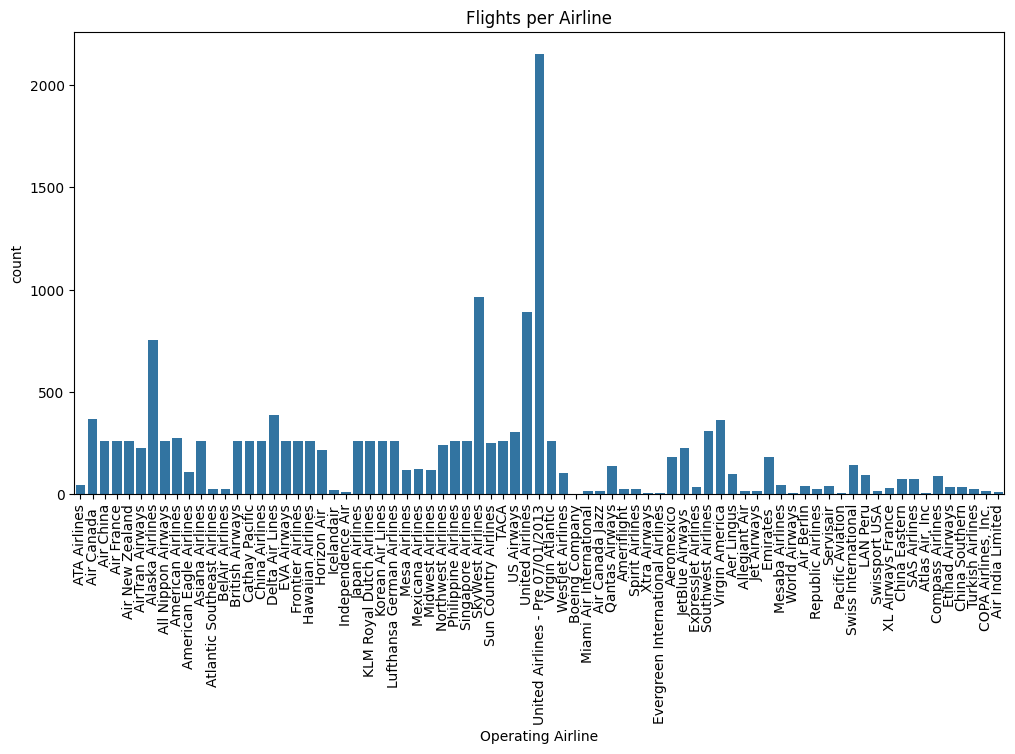

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Operating Airline', data=df)
plt.xticks(rotation=90)
plt.title('Flights per Airline')
plt.show()

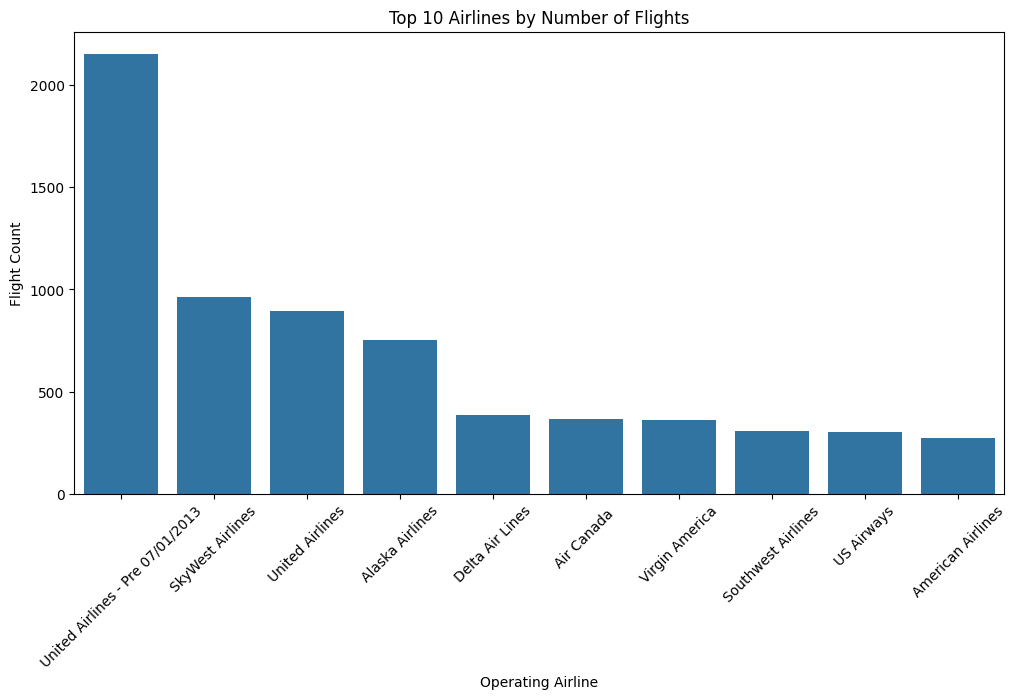

In [21]:
top_airlines = df['Operating Airline'].value_counts().nlargest(10).index
df_top = df[df['Operating Airline'].isin(top_airlines)]
plt.figure(figsize=(12,6))
sns.countplot(x='Operating Airline', data=df_top, order=top_airlines)
plt.xticks(rotation=45)
plt.title('Top 10 Airlines by Number of Flights')
plt.xlabel('Operating Airline')
plt.ylabel('Flight Count')
plt.show()

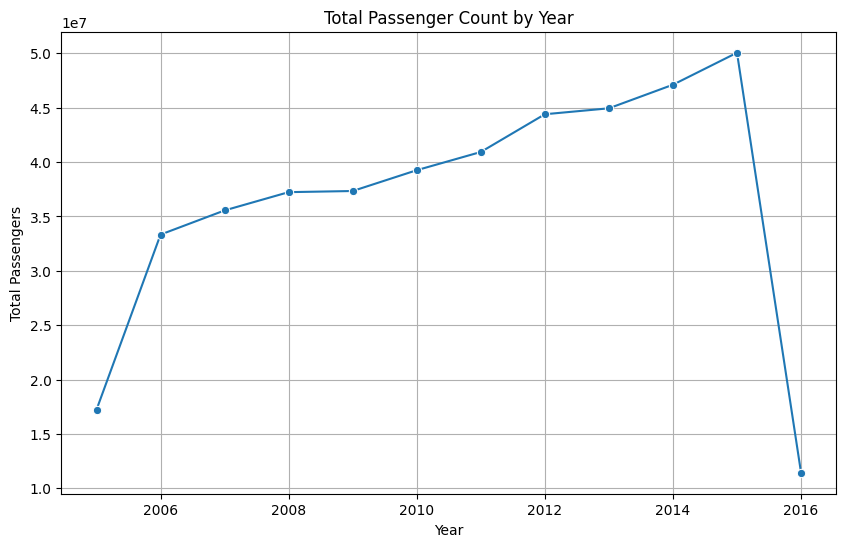

In [16]:
yearly_passengers = df.groupby('Year')['Passenger Count'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_passengers.index, y=yearly_passengers.values, marker='o')
plt.title('Total Passenger Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.show()

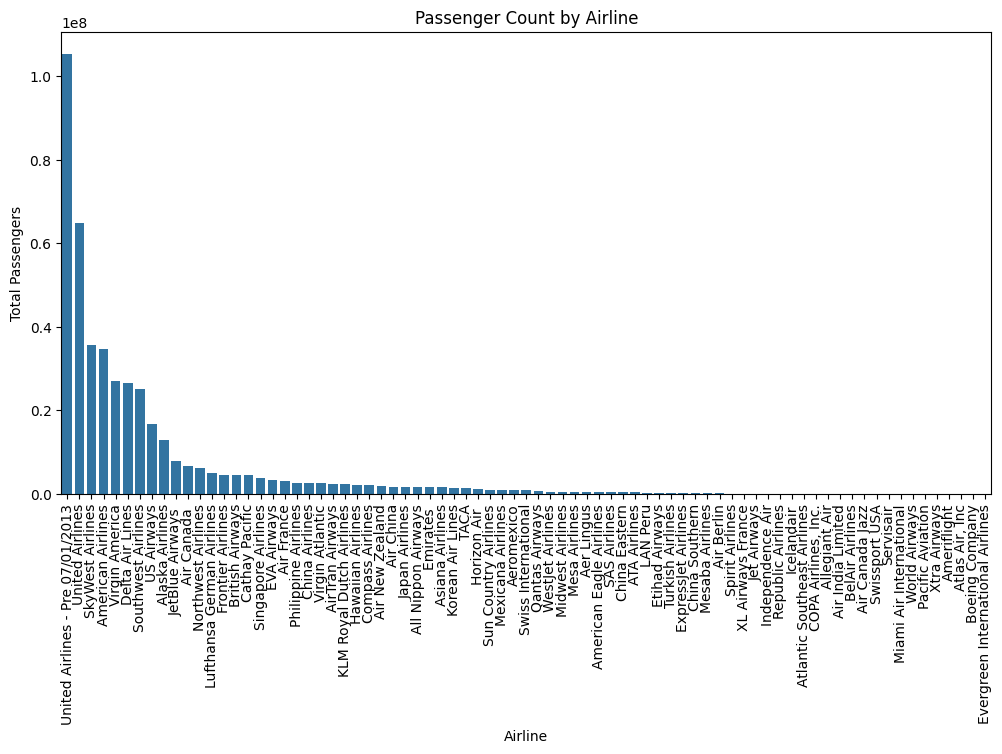

In [17]:
airline_passengers = df.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=airline_passengers.index, y=airline_passengers.values)
plt.xticks(rotation=90)
plt.title('Passenger Count by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Passengers')
plt.show()

In [24]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Airplane_Crashes_and_Fatalities_Since_1908-2.csv")

In [25]:
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [26]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [34]:
df = df.drop(columns=['Time'])

KeyError: "['Time'] not found in axis"

In [35]:

df = df.drop(columns=['cn/In'])


In [36]:
df.head(2)

,Date,Location,Operator,Flight #,Route,Type,Registration,Aboard,Fatalities,Ground,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...


In [38]:
df['Aboard'] = df['Aboard'].fillna(df['Aboard'].mean())
df['Fatalities'] = df['Fatalities'].fillna(df['Fatalities'].mean())
df['Ground'] = df['Ground'].fillna(df['Ground'].mean())



In [39]:
df.head(3)

,Date,Location,Operator,Flight #,Route,Type,Registration,Aboard,Fatalities,Ground,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [40]:
df['Registration'] = df['Registration'].fillna(df['Registration'].mode()[0])


In [41]:
df.isnull().sum()

Date               0
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration       0
Aboard             0
Fatalities         0
Ground             0
Summary          390
dtype: int64

In [43]:
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna('Unknown')



In [44]:
df.isnull().sum()

Date            0
Location        0
Operator        0
Flight #        0
Route           0
Type            0
Registration    0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [45]:
crash_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908-2.csv")
passenger_df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [47]:
crash_df['Operator'] = crash_df['Operator'].str.strip().str.upper()
passenger_df['Operating Airline'] = passenger_df['Operating Airline'].str.strip().str.upper()
merged_df = pd.merge(crash_df, passenger_df, left_on='Operator', right_on='Operating Airline', how='left')


In [48]:
merged_df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/09/1913,18:30,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/17/1913,10:30,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_df.isnull().sum()

Date                               0
Time                           22154
Location                          20
Operator                          18
Flight #                       37545
Route                          12756
Type                             284
Registration                    2019
cn/In                           7823
Aboard                          1050
Fatalities                       269
Ground                           536
Summary                         5016
Activity Period                 5046
Operating Airline               5046
Operating Airline IATA Code     5046
Published Airline               5046
Published Airline IATA Code     5046
GEO Summary                     5046
GEO Region                      5046
Activity Type Code              5046
Price Category Code             5046
Terminal                        5046
Boarding Area                   5046
Passenger Count                 5046
Adjusted Activity Type Code     5046
Adjusted Passenger Count        5046
Y

In [50]:
merged_df = merged_df.drop_duplicates()

In [51]:
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[num_cols] = merged_df[num_cols].fillna(merged_df[num_cols].median())


In [52]:
obj_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[obj_cols] = merged_df[obj_cols].fillna('Unknown')

In [53]:
merged_df.isnull().sum()

Date                           0
Time                           0
Location                       0
Operator                       0
Flight #                       0
Route                          0
Type                           0
Registration                   0
cn/In                          0
Aboard                         0
Fatalities                     0
Ground                         0
Summary                        0
Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

In [55]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

In [56]:
print(merged_df.shape)
print(merged_df.describe())

(65880, 29)
                                Date        Aboard    Fatalities  \
count                          65880  65880.000000  65880.000000   
mean   1960-05-03 11:15:48.196721280     45.542243     26.136582   
min              1908-09-17 00:00:00      0.000000      0.000000   
25%              1944-11-29 00:00:00      6.000000      2.000000   
50%              1955-08-04 00:00:00     20.000000      7.000000   
75%              1974-02-22 00:00:00     61.000000     27.000000   
max              2009-06-08 00:00:00    644.000000    583.000000   
std                              NaN     64.843548     44.350022   

             Ground  Activity Period  Passenger Count  \
count  65880.000000     65880.000000     65880.000000   
mean      12.155434    201042.556800     33864.089223   
min        0.000000    200507.000000         1.000000   
25%        0.000000    200805.000000      7309.000000   
50%        0.000000    201012.000000     11874.000000   
75%        0.000000    201305.000

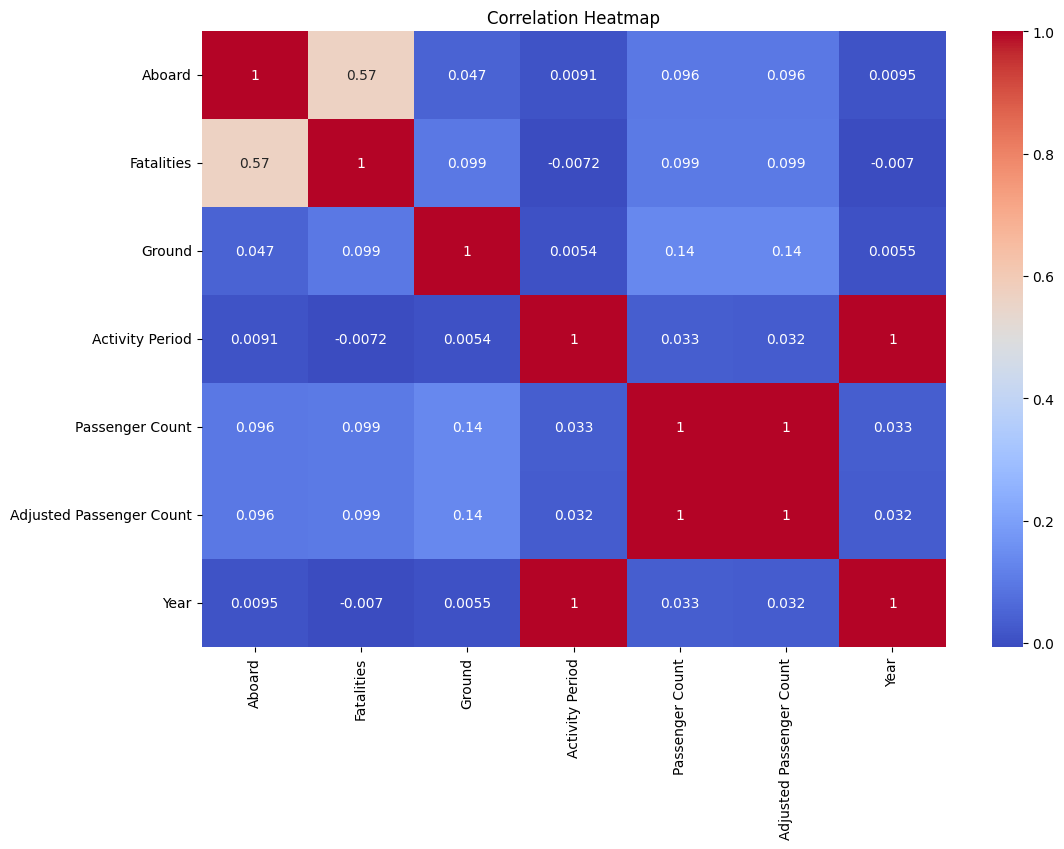

In [58]:
numeric_df = merged_df.select_dtypes(include=['number'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

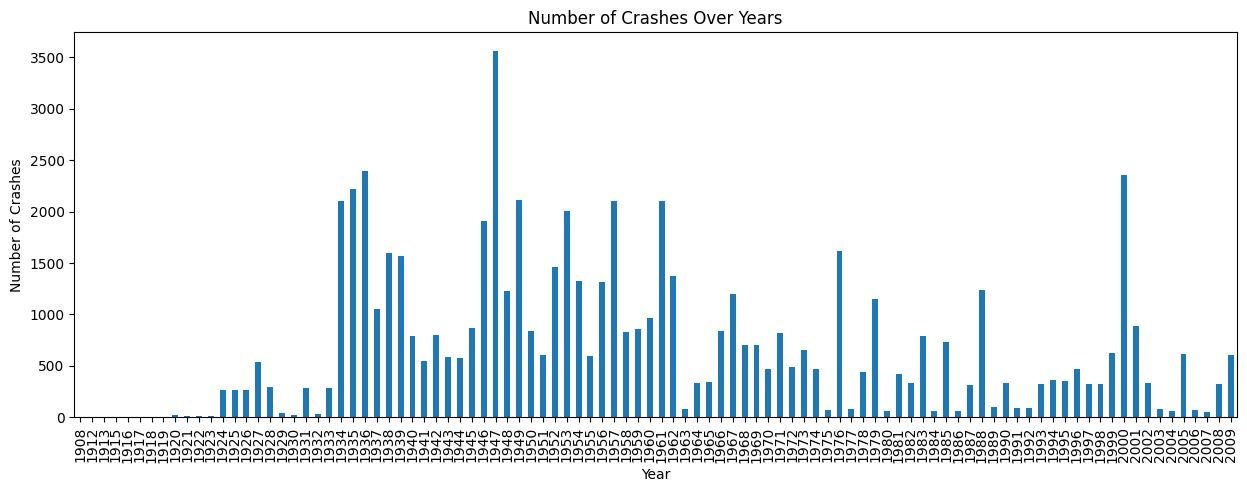

In [60]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.title("Number of Crashes Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()


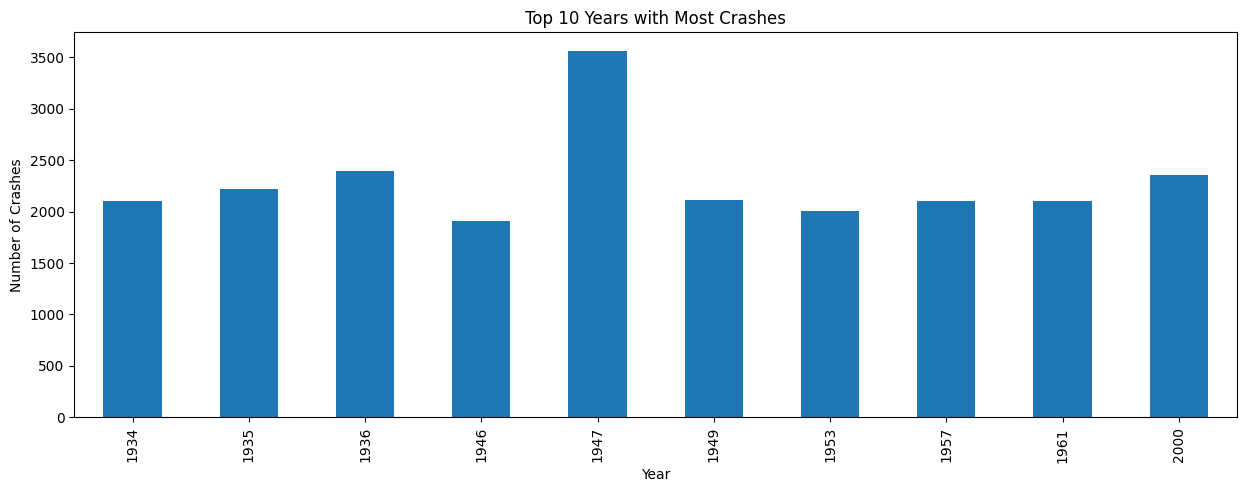

In [62]:
merged_df['year'] = merged_df['Date'].dt.year

top10_years = merged_df['year'].value_counts().nlargest(10).sort_index()
top10_years.plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Years with Most Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()

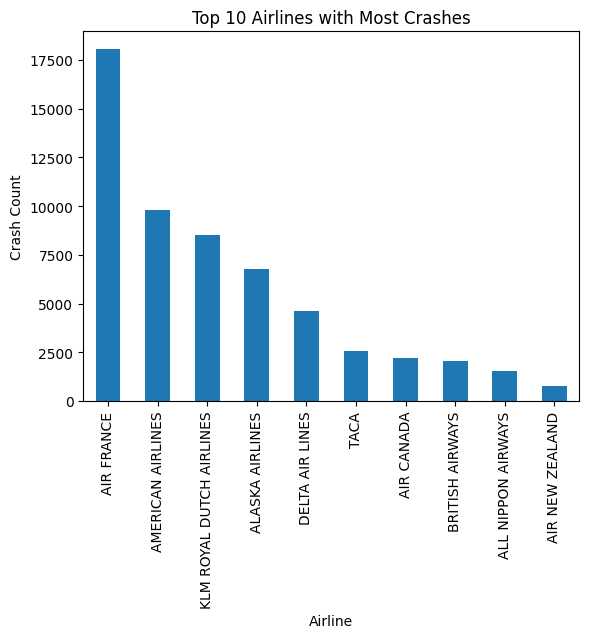

In [64]:
merged_df['Operator'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Airlines with Most Crashes")
plt.xlabel("Airline")
plt.ylabel("Crash Count")
plt.show()

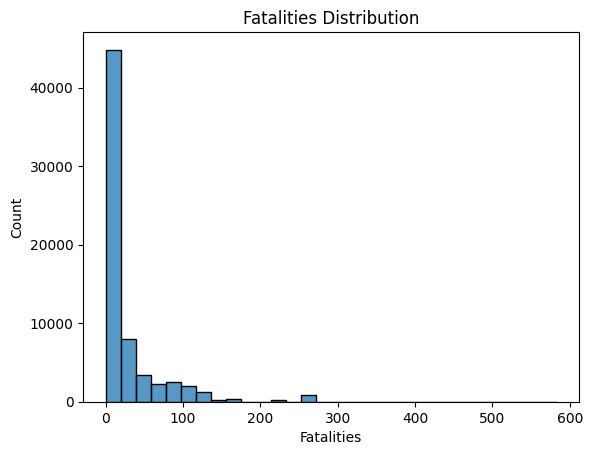

In [66]:
sns.histplot(merged_df['Fatalities'], bins=30)
plt.title("Fatalities Distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18492\4104053011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette="viridis")


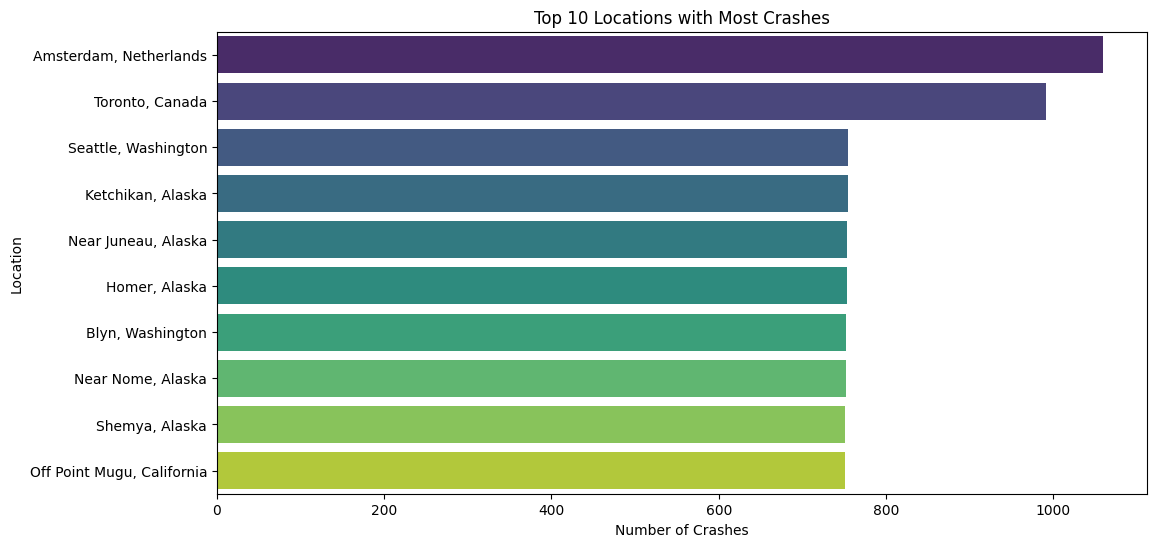

In [67]:
location_counts = merged_df['Location'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="viridis")
plt.title("Top 10 Locations with Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Location")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18492\3510784915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette="magma")


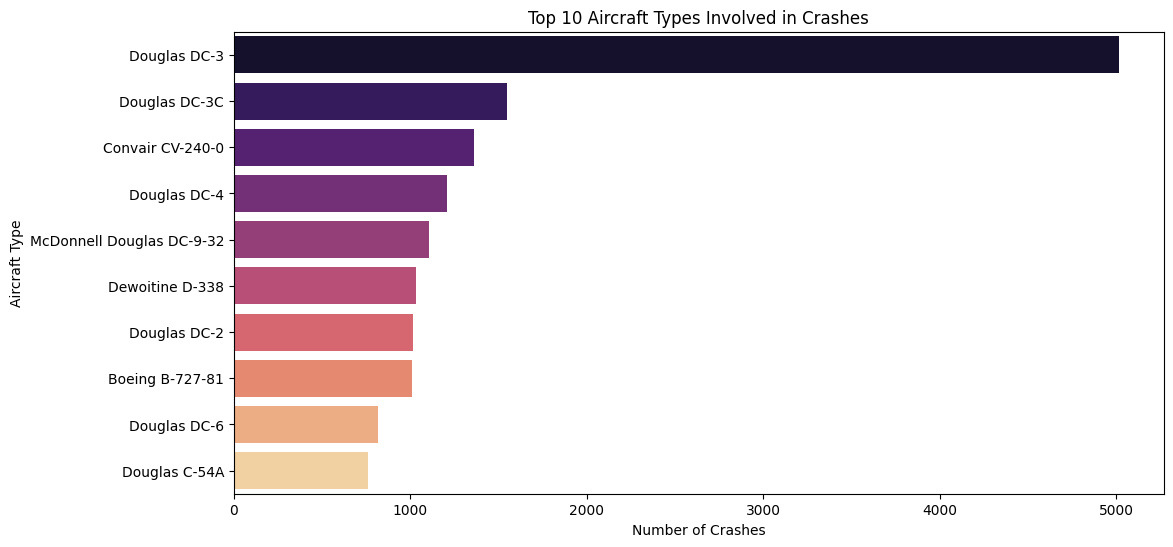

In [68]:
type_counts = merged_df['Type'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.values, y=type_counts.index, palette="magma")
plt.title("Top 10 Aircraft Types Involved in Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Aircraft Type")
plt.show()

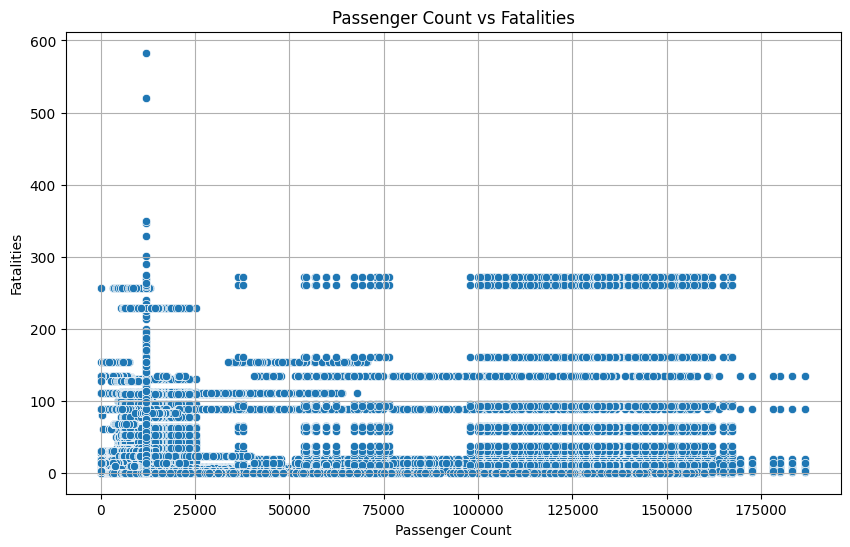

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=merged_df['Passenger Count'], y=merged_df['Fatalities'])
plt.title("Passenger Count vs Fatalities")
plt.xlabel("Passenger Count")
plt.ylabel("Fatalities")
plt.grid(True)
plt.show()

In [70]:
merged_df['Fatality_Rate'] = merged_df['Fatalities'] / merged_df['Aboard']